In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler

In [25]:
# 2.
# Load the regression dataset
reg_df = pd.read_csv('/content/regression_dataset.csv')

In [26]:
# 3.
print(reg_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     385 non-null    float64
 1   Sex                     385 non-null    float64
 2   T_Stage                 385 non-null    float64
 3   N_Stage                 385 non-null    float64
 4   6th_Stage               385 non-null    float64
 5   Differentiated          385 non-null    float64
 6   Grade                   385 non-null    float64
 7   A_Stage                 385 non-null    float64
 8   Tumor_Size              385 non-null    float64
 9   Estrogen_Status         385 non-null    float64
 10  Progesterone_Status     385 non-null    float64
 11  Regional_Node_Examined  385 non-null    float64
 12  Reginol_Node_Positive   385 non-null    float64
 13  Survival_Months         385 non-null    float64
dtypes: float64(14)
memory usage: 42.2 KB
None


In [27]:
# 4.
print(reg_df.describe())

              Age         Sex     T_Stage     N_Stage   6th_Stage  \
count  385.000000  385.000000  385.000000  385.000000  385.000000   
mean    55.589610    0.358442    1.831169    1.353247    2.220779   
std      9.530811    0.480167    0.699751    0.520313    0.921720   
min     30.000000    0.000000    1.000000    1.000000    1.000000   
25%     49.000000    0.000000    1.000000    1.000000    2.000000   
50%     57.000000    0.000000    2.000000    1.000000    2.000000   
75%     64.000000    1.000000    2.000000    2.000000    3.000000   
max     69.000000    1.000000    4.000000    3.000000    5.000000   

       Differentiated       Grade     A_Stage  Tumor_Size  Estrogen_Status  \
count      385.000000  385.000000  385.000000  385.000000       385.000000   
mean         2.688312    2.311688    0.018182   29.197403         0.870130   
std          0.605094    0.605094    0.133782   14.681426         0.336598   
min          1.000000    1.000000    0.000000    2.000000         

In [28]:
# 5.
# Check for missing values
print("\nMissing values per column:")
print(reg_df.isnull().sum())


Missing values per column:
Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
dtype: int64


In [29]:
# 6.
print("Dataset Dimension (Rows, Columns):", reg_df.shape)

Dataset Dimension (Rows, Columns): (385, 14)


In [30]:
# 7.
(list(reg_df.columns))

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [31]:
# 8.
# Check original unique values
print("Sex values:",reg_df['Sex'].unique())
print("T_Stage:",reg_df['T_Stage'].unique())
print("N_Stage:",reg_df['N_Stage'].unique())
print("6th_Stage:",reg_df['6th_Stage'].unique())
print("Differentiated:",reg_df['Differentiated'].unique())
print("A_Stage:",reg_df['A_Stage'].unique())
print("Estrogen_Status:",reg_df['Estrogen_Status'].unique())
print("Progesterone_Status:",reg_df['Progesterone_Status'].unique())

Sex values: [0. 1.]
T_Stage: [2. 1. 3. 4.]
N_Stage: [1. 3. 2.]
6th_Stage: [2. 1. 5. 3. 4.]
Differentiated: [3. 2. 4. 1.]
A_Stage: [0. 1.]
Estrogen_Status: [1. 0.]
Progesterone_Status: [1. 0.]


Regression Model Building and Evaluation

In [32]:
# Separate features and target
X = reg_df.drop("Survival_Months", axis=1)
y = reg_df["Survival_Months"]

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [34]:
# Standardize the features (optional but often helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Function to evaluate and plost regression model performanc
def evaluate_regression_model(regressor, X_train, X_test, y_train, y_test, name):
    """
    Train the given regression model and evaluate its performance on test data.
    """

    # Train the model
    regressor.fit(X_train, y_train)

    # Generate predictions
    predictions = regressor.predict(X_test)

    # Compute evaluation metrics
    mse_val = mean_squared_error(y_test, predictions)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_test, predictions)
    mae_val = mean_absolute_error(y_test, predictions)

    # Display metrics
    print(f"\n{name} - Regression Evaluation Metrics:")
    print(f"  ▸ MSE  : {mse_val:.2f}")
    print(f"  ▸ RMSE : {rmse_val:.2f}")
    print(f"  ▸ MAE  : {mae_val:.2f}")
    print(f"  ▸ R²   : {r2_val:.4f}")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=predictions, color="green", edgecolor="black")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f"{name} - Predicted vs Actual Survival Months")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    return r2_val, rmse_val



Decision Tree Regressor - Regression Evaluation Metrics:
  ▸ MSE  : 1270.59
  ▸ RMSE : 35.65
  ▸ MAE  : 29.14
  ▸ R²   : -1.1777


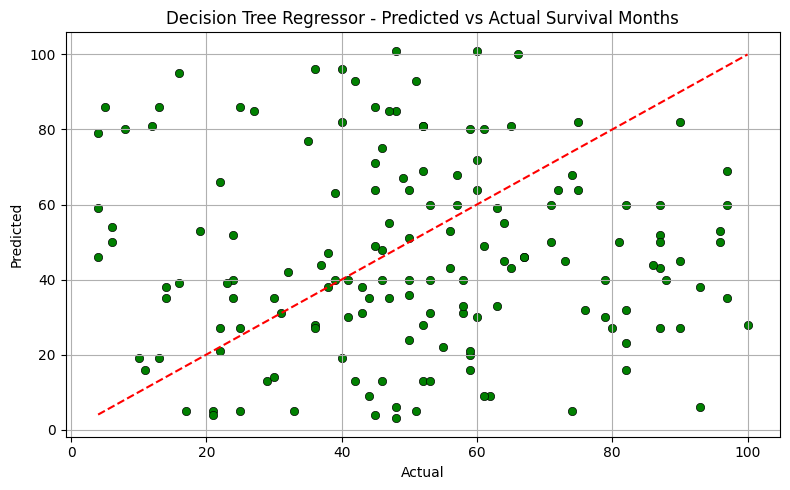

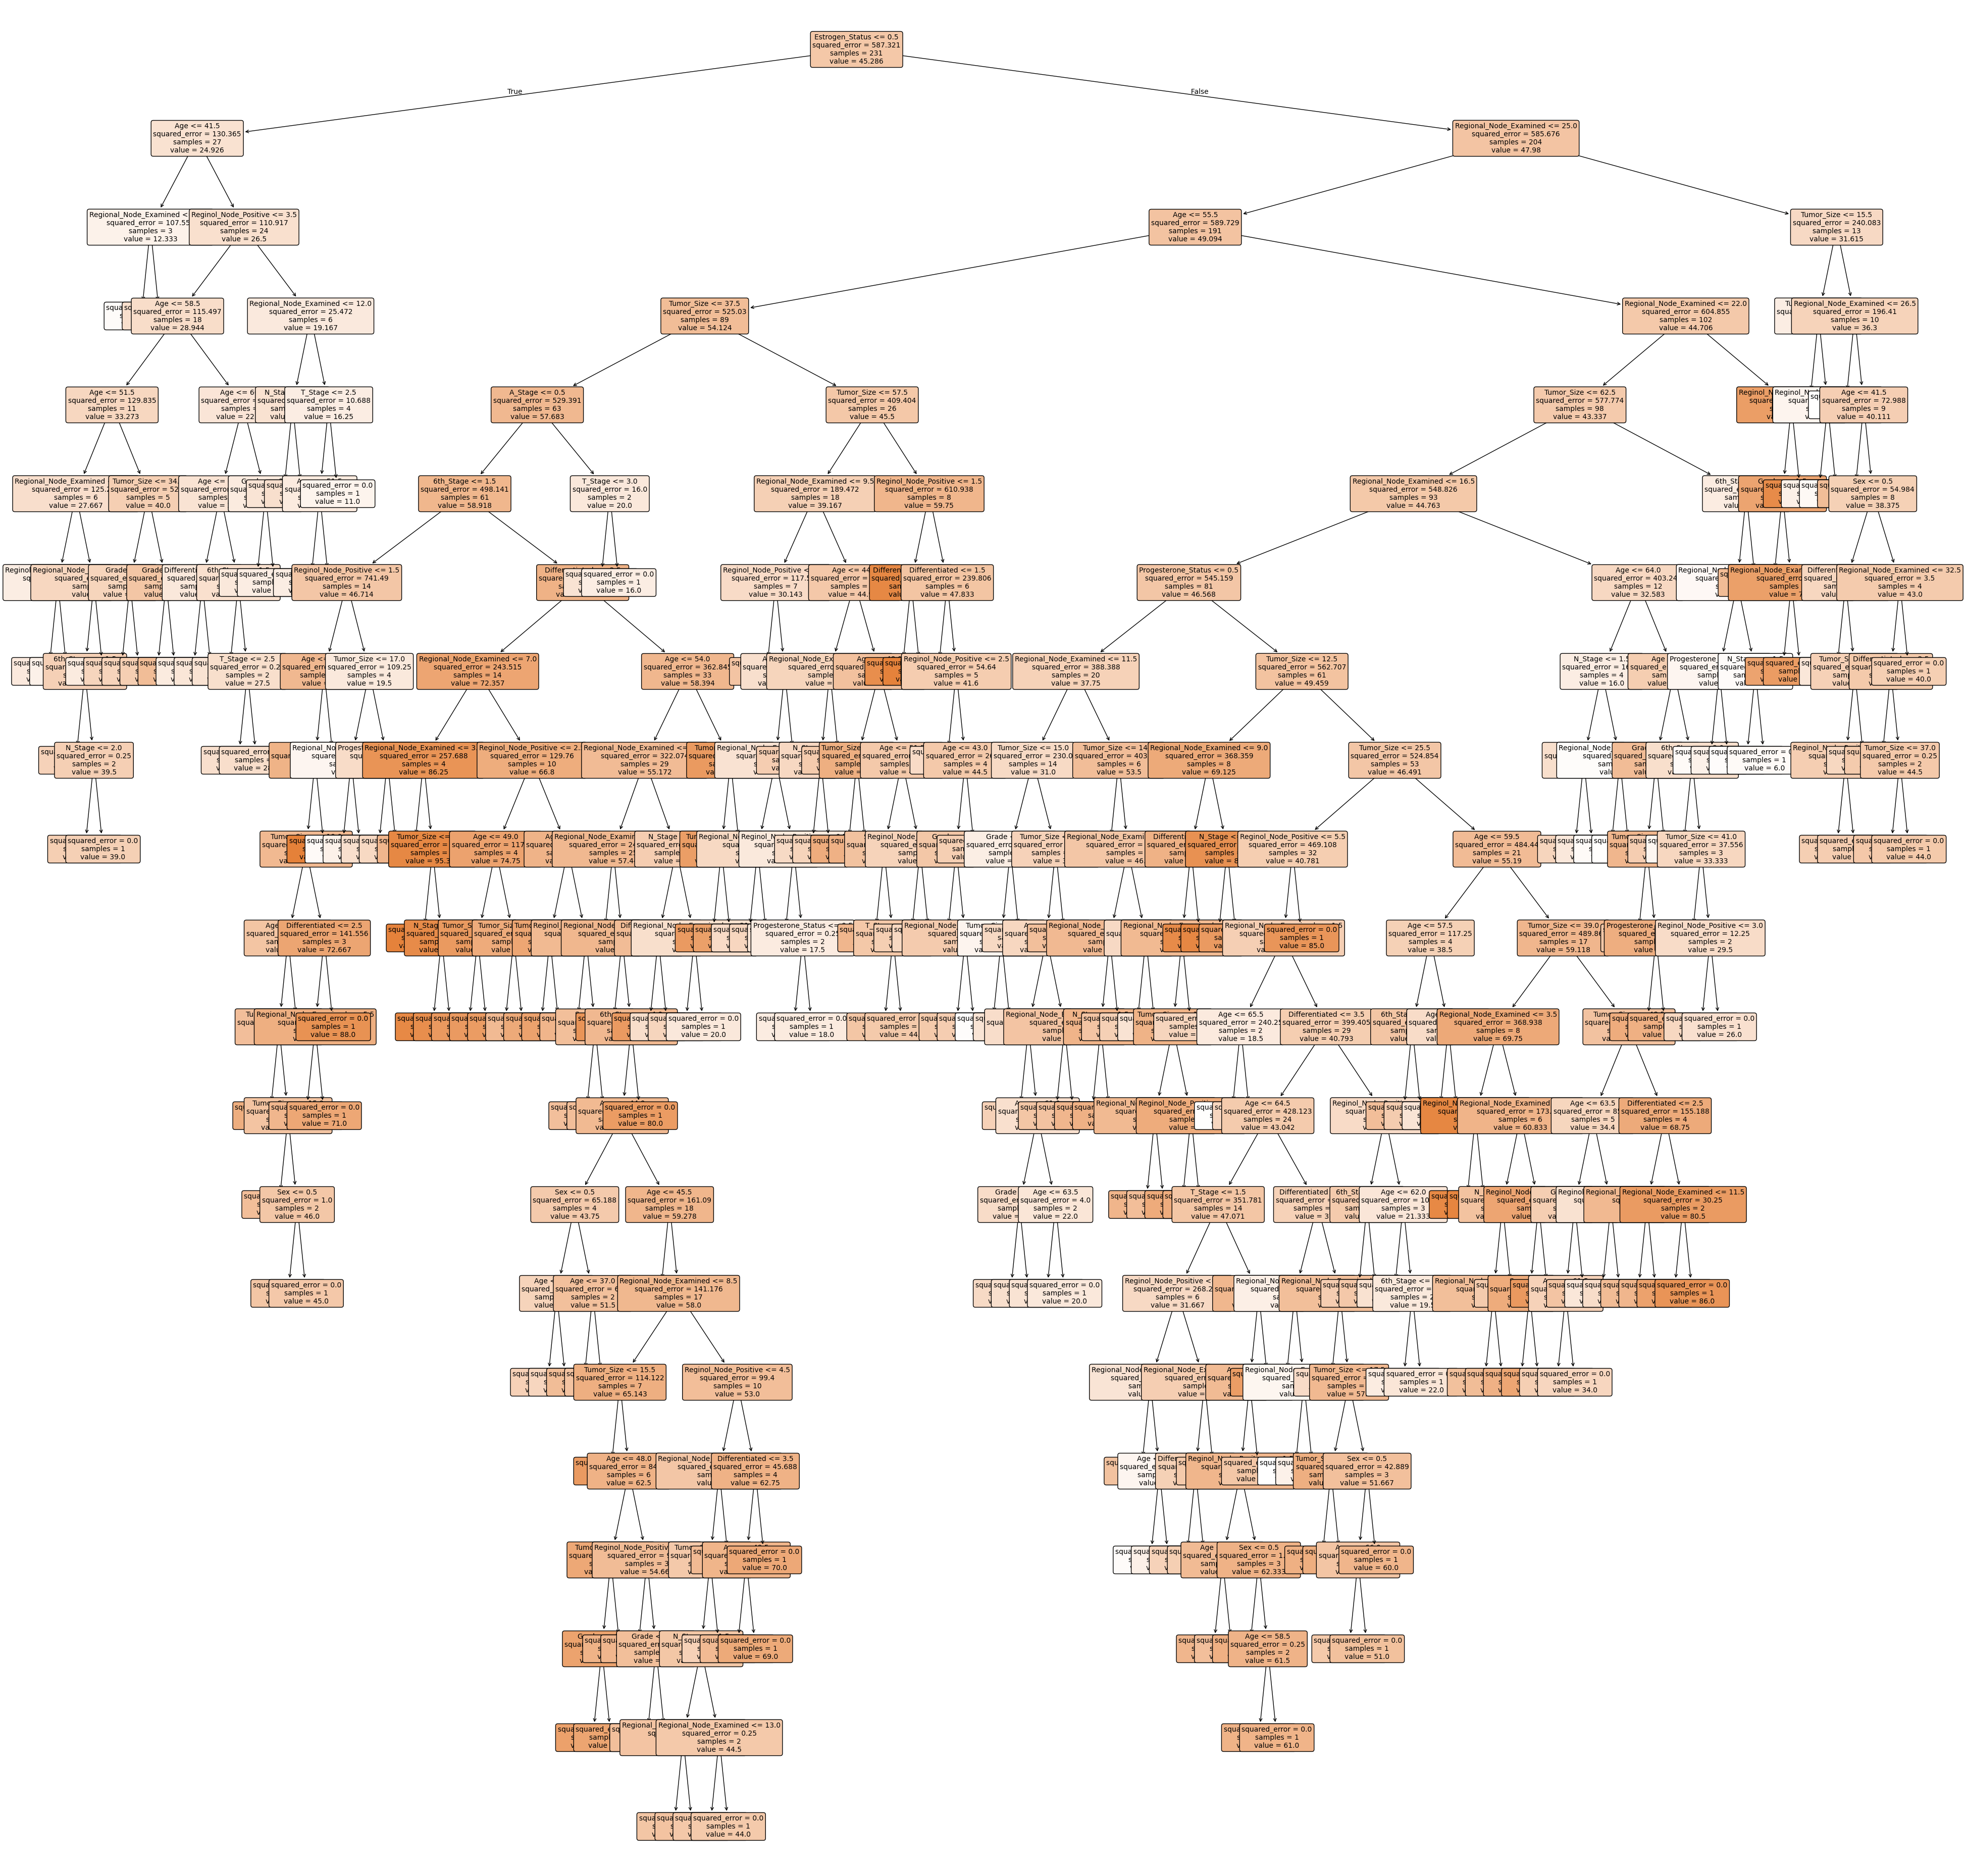

In [36]:
# Set up a Decision Tree Regressor with a defined random seed for consistent results
dt_regressor = DecisionTreeRegressor(random_state=42)

# Evaluate the model performance using the custom assessment function
dt_r2, dt_rmse = evaluate_regression_model(
    dt_regressor, X_train, X_test, y_train, y_test, "Decision Tree Regressor"
)

print()

# Initialize a new plot for the decision tree visualization
plt.figure(figsize=(48, 48))
tree_diagram = tree.plot_tree(
    dt_regressor,
    feature_names=X_train.columns.tolist(),
    filled=True,
    rounded=True,
    fontsize=10
)

# Save the decision tree diagram to a file
plt.savefig("decision_tree_visualization.png")



Shallow Decision Tree (max_depth=5) - Regression Evaluation Metrics:
  ▸ MSE  : 761.26
  ▸ RMSE : 27.59
  ▸ MAE  : 21.46
  ▸ R²   : -0.3048


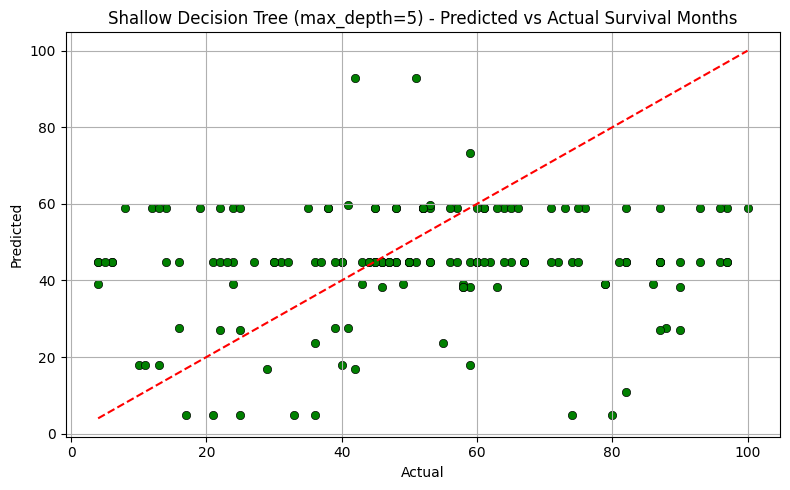

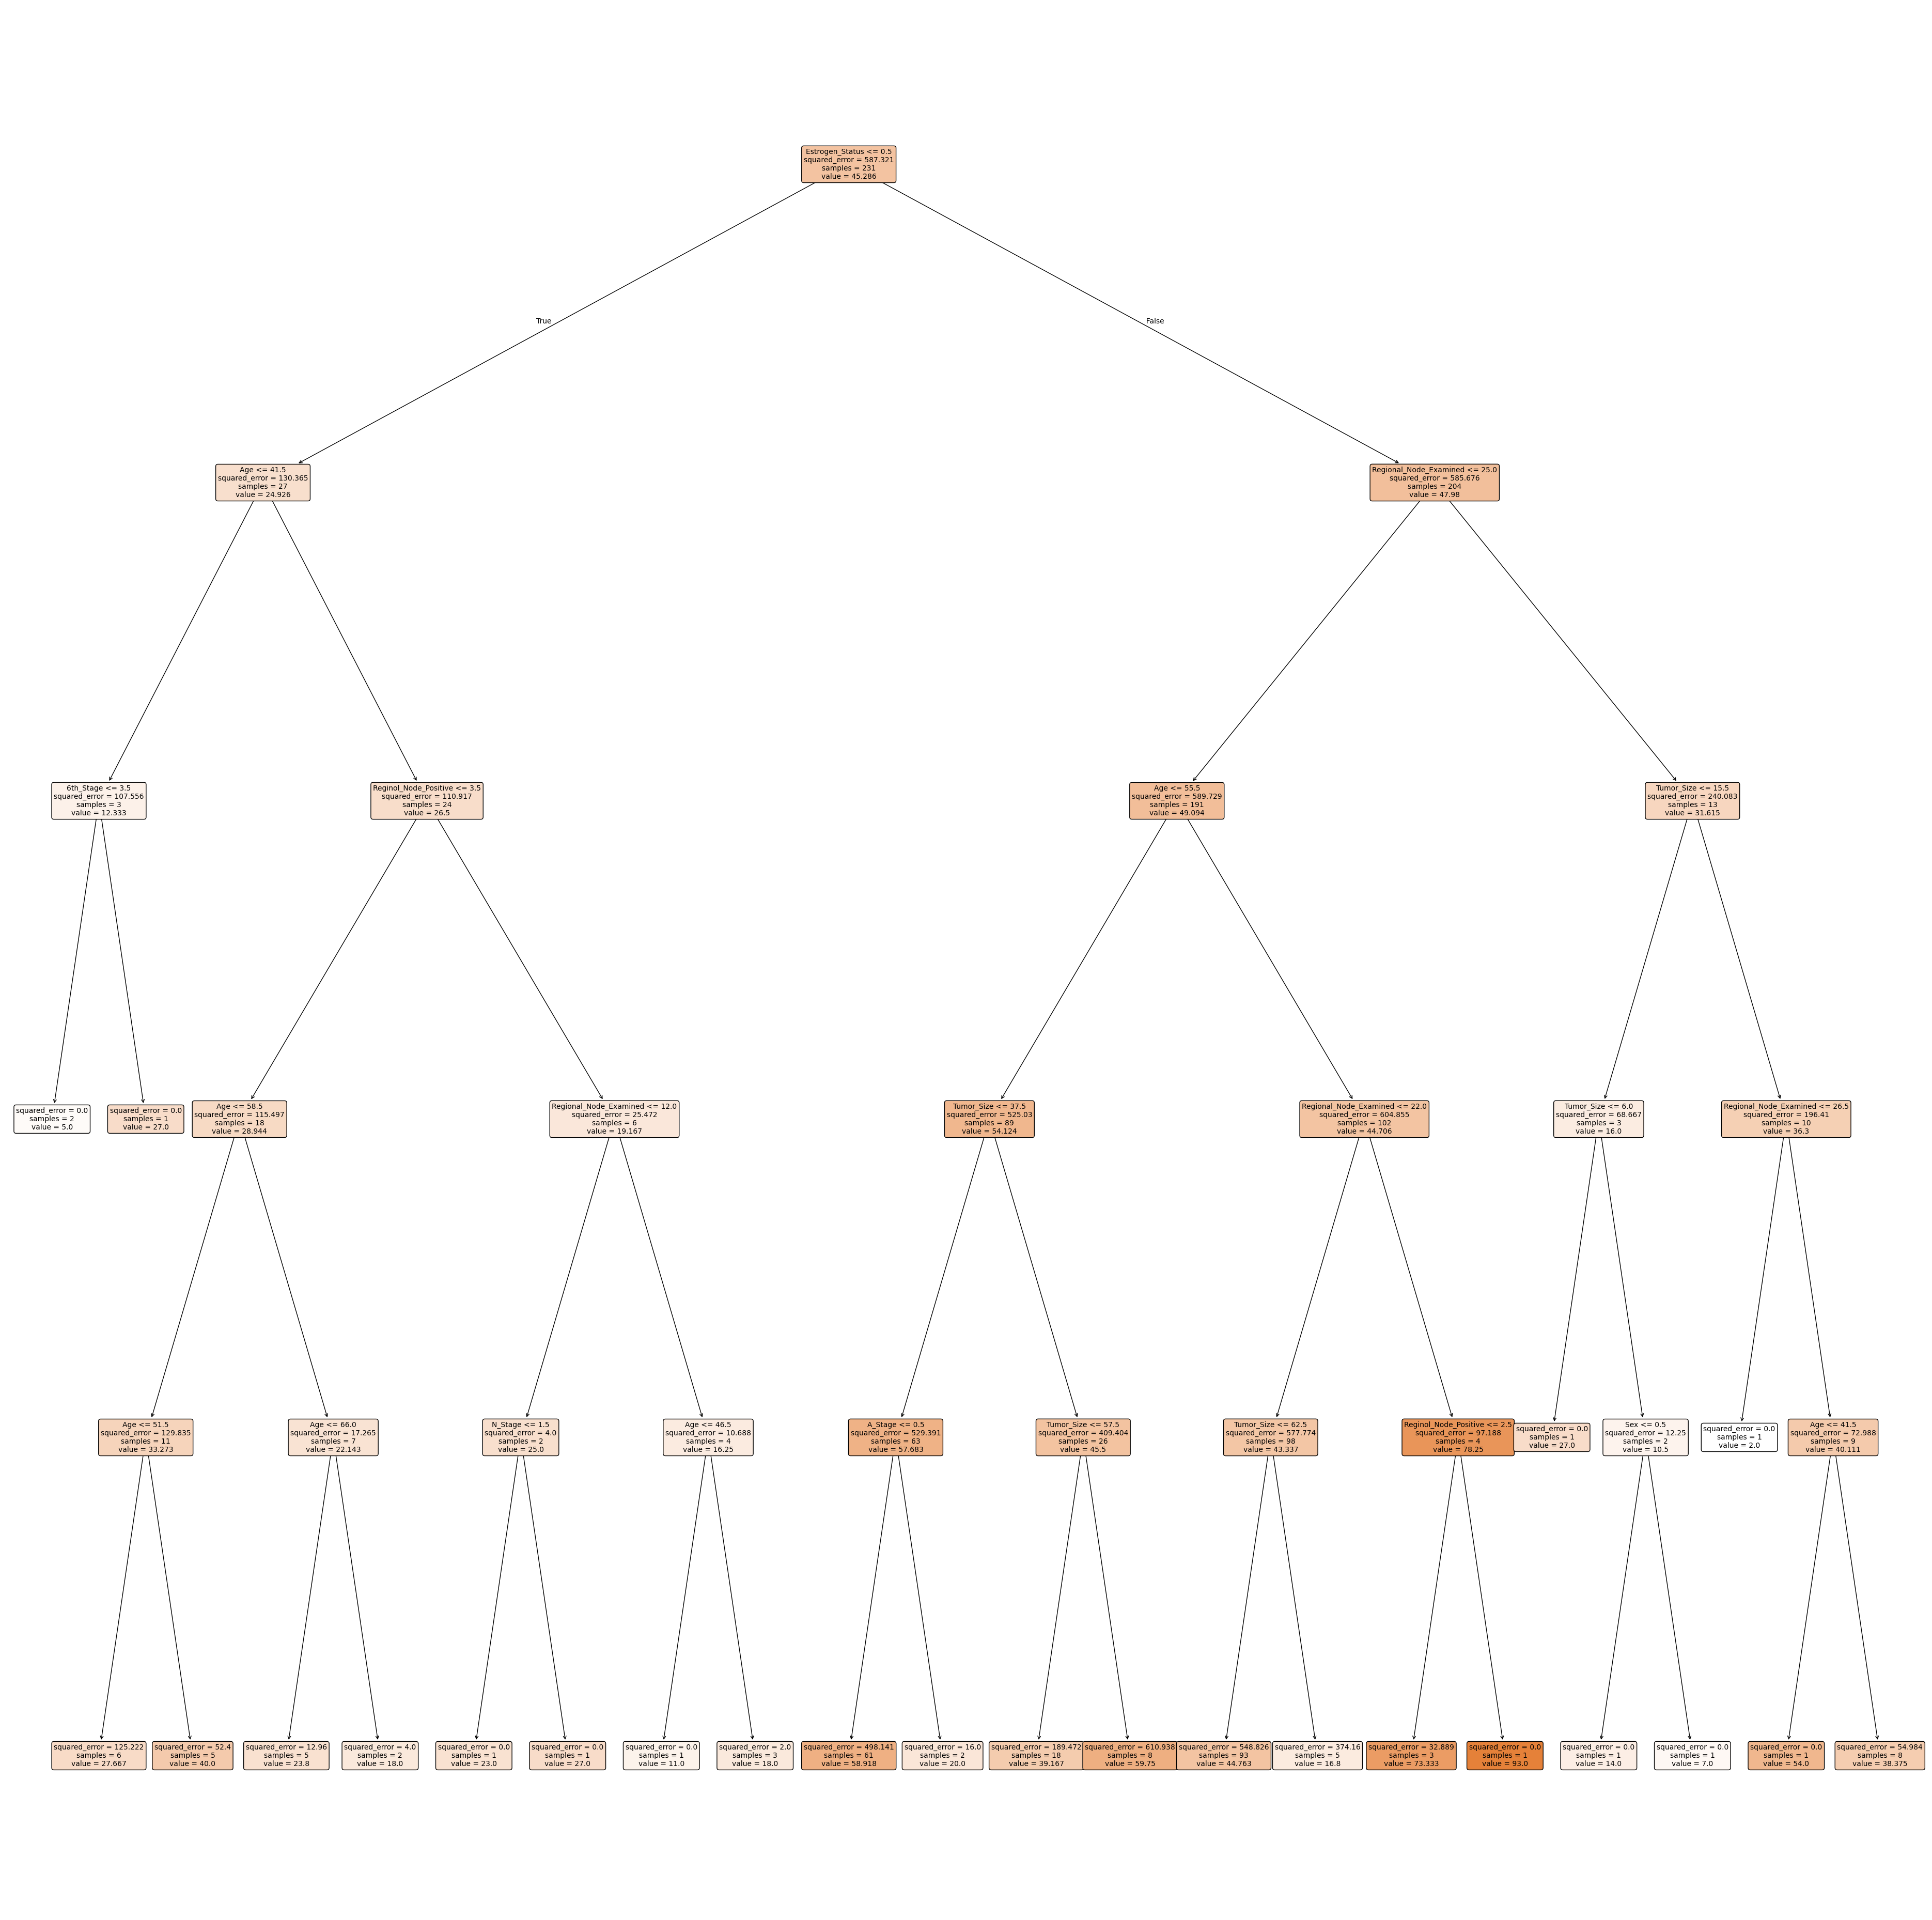

In [37]:
    # Create a Decision Tree Regressor with a maximum depth limit
    shallow_tree = DecisionTreeRegressor(max_depth=5)

    # Evaluate model performance using the custom assessment function
    shallow_r2, shallow_rmse = evaluate_regression_model(
        shallow_tree, X_train, X_test, y_train, y_test, "Shallow Decision Tree (max_depth=5)"
    )
    print()

    # Create a figure for the tree visualization
    plt.figure(figsize=(48, 48))

    # Plot the decision tree using feature names and fill nodes with class info
    tree.plot_tree(
        shallow_tree,
        feature_names=X_train.columns.tolist(),
        filled=True,
        rounded=True,
        fontsize=10
    )
    # Save the visualization as a PNG image
    plt.savefig("shallow_decision_tree.png")


Multiple Linear Regression - Regression Evaluation Metrics:
  ▸ MSE  : 689.79
  ▸ RMSE : 26.26
  ▸ MAE  : 20.10
  ▸ R²   : -0.1823


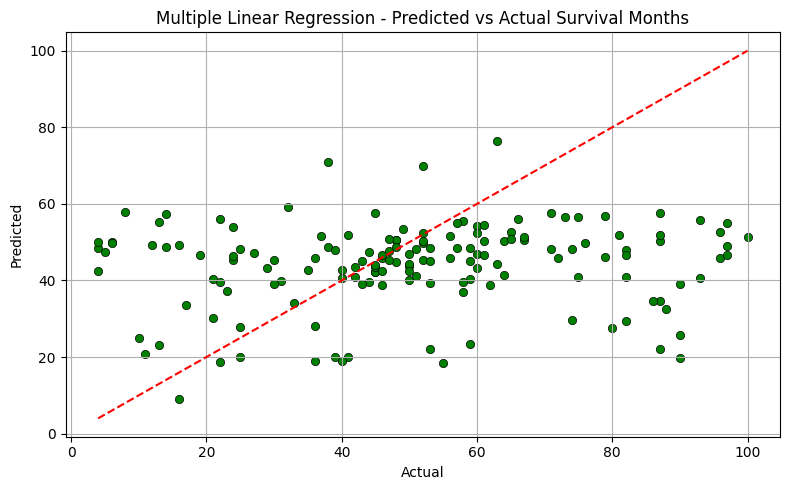

In [38]:
# Instantiate a Multiple Linear Regression model
mlr_model = LinearRegression()

# Use the custom evaluation function to assess the model's regression performance
linear_r2, linear_rmse = evaluate_regression_model(
    mlr_model, X_train, X_test, y_train, y_test, "Multiple Linear Regression"
)


In [39]:
print("Intercept:", mlr_model.intercept_)
print("Coefficients:", mlr_model.coef_)

Intercept: 43.07536022733355
Coefficients: [ -0.29099606  -3.38089054   2.58764023  -4.0795127    6.50354574
  -1.16773811   1.16773811 -27.54205368  -0.35298067  19.9787201
   6.4400919   -0.20247103  -0.94829344]


In [40]:
# Prepare input data for patient B002567
new_patient = pd.DataFrame([{
    'Age': 40,
    'Tumor_Size': 32,
    'Regional_Node_Examined': 10,
    'Regional_Node_Positive': 2,
    'Grade' : 2,

    # Encoded categorical and binary features

    'Estrogen_Status_Positive': 1,
    'Progesterone_Status_Positive': 0,

    'A_Stage_Regional': 0,
    'T_Stage_T2': 2,
    'N_Stage_N2': 2,
    '6th_Stage' : 5,

    'Differentiated_Moderately differentiated': 1,


}])

# Ensure the patient input matches the original training features' order
new_patient = new_patient.reindex(columns=X.columns, fill_value=0)

# Refit the MinMaxScaler on the training data
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)

# Normalize the new patient's data using the trained scaler
new_patient_scaled = pd.DataFrame(minmax_scaler.transform(new_patient), columns=X.columns)


In [41]:
# Predict with MLR
mlr_prediction = mlr_model.predict(new_patient_scaled)[0]

# Predict with DTR
dtr_prediction = shallow_tree.predict(new_patient_scaled)[0]

# Show results
print(f"Predicted Survival Months (MLR): {mlr_prediction:.2f}")
print(f"Predicted Survival Months (DTR): {dtr_prediction:.2f}")

Predicted Survival Months (MLR): 51.38
Predicted Survival Months (DTR): 5.00



Multiple Linear Regression - Regression Evaluation Metrics:
  ▸ MSE  : 689.79
  ▸ RMSE : 26.26
  ▸ MAE  : 20.10
  ▸ R²   : -0.1823


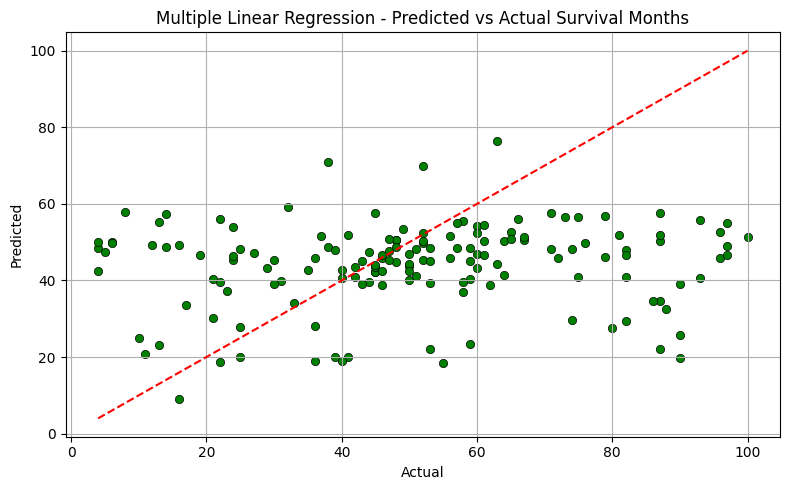


Decision Tree Regressor - Regression Evaluation Metrics:
  ▸ MSE  : 1270.59
  ▸ RMSE : 35.65
  ▸ MAE  : 29.14
  ▸ R²   : -1.1777


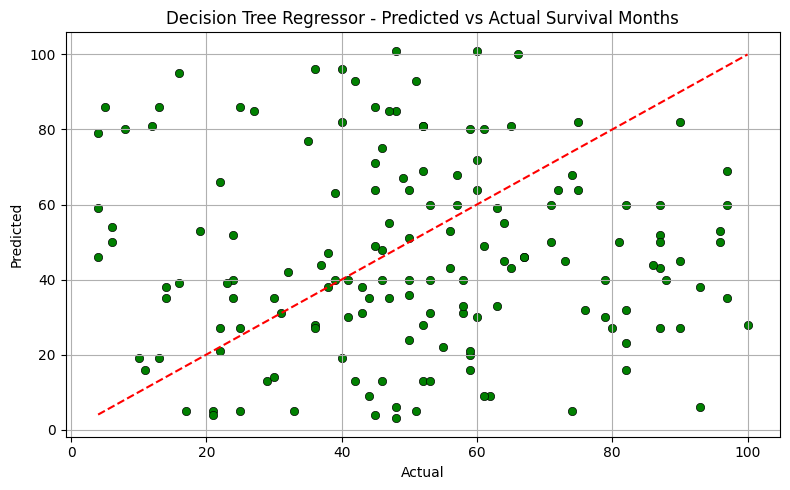


Shallow Decision Tree - Regression Evaluation Metrics:
  ▸ MSE  : 755.12
  ▸ RMSE : 27.48
  ▸ MAE  : 21.42
  ▸ R²   : -0.2943


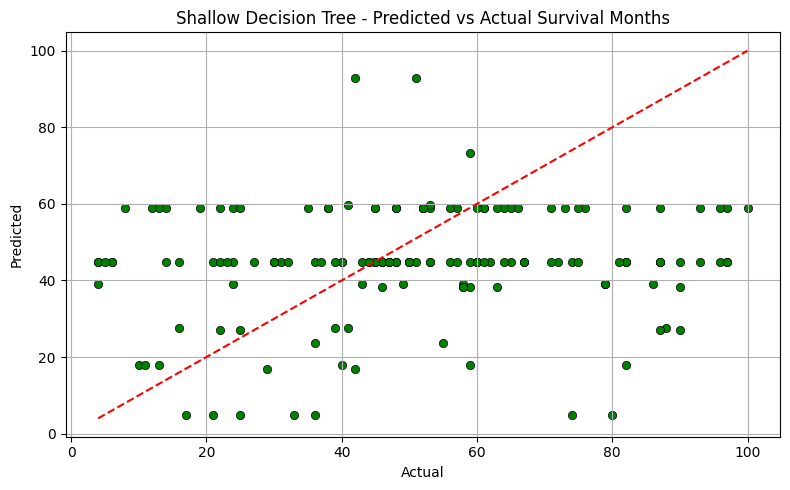


Optimal model (based on lowest RMSE): Multiple Linear Regression


In [42]:
# Define a dictionary of trained regression models to compare
regression_models = {
    "Multiple Linear Regression": mlr_model,
    "Decision Tree Regressor": dt_regressor,
    "Shallow Decision Tree": shallow_tree,
    # You can include additional models here
}

# Dictionary to store evaluation results
evaluation_scores = {}

# Loop through each model and record performance metrics
for model_name, reg_model in regression_models.items():
    r2_score_val, rmse_val = evaluate_regression_model(
        reg_model, X_train, X_test, y_train, y_test, model_name
    )
    evaluation_scores[model_name] = {
        'R2_Score': r2_score_val,
        'RMSE': rmse_val
    }

# Identify the model with the lowest RMSE value
top_model_by_rmse = min(evaluation_scores, key=lambda name: evaluation_scores[name]['RMSE'])
print(f"\nOptimal model (based on lowest RMSE): {top_model_by_rmse}")

Ensemble Leaner

In [43]:
import pandas as pd

In [44]:
# 2.
df = pd.read_csv('/content/classification_dataset.csv')

In [45]:
# 3.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     770 non-null    float64
 1   Sex                     770 non-null    float64
 2   T_Stage                 770 non-null    float64
 3   N_Stage                 770 non-null    float64
 4   6th_Stage               770 non-null    float64
 5   Differentiated          770 non-null    float64
 6   Grade                   770 non-null    float64
 7   A_Stage                 770 non-null    float64
 8   Tumor_Size              770 non-null    float64
 9   Estrogen_Status         770 non-null    float64
 10  Progesterone_Status     770 non-null    float64
 11  Regional_Node_Examined  770 non-null    float64
 12  Reginol_Node_Positive   770 non-null    float64
 13  Mortality_Status        770 non-null    float64
dtypes: float64(14)
memory usage: 84.3 KB
None


In [46]:
# 4.
print(df.describe())

              Age         Sex     T_Stage     N_Stage   6th_Stage  \
count  770.000000  770.000000  770.000000  770.000000  770.000000   
mean    54.568831    0.364935    1.737662    1.284416    2.045455   
std      9.406915    0.481725    0.692715    0.482075    0.908999   
min     30.000000    0.000000    1.000000    1.000000    1.000000   
25%     47.000000    0.000000    1.000000    1.000000    1.000000   
50%     55.000000    0.000000    2.000000    1.000000    2.000000   
75%     63.000000    1.000000    2.000000    2.000000    3.000000   
max     69.000000    1.000000    4.000000    3.000000    5.000000   

       Differentiated       Grade     A_Stage  Tumor_Size  Estrogen_Status  \
count      770.000000  770.000000  770.000000  770.000000       770.000000   
mean         2.802597    2.197403    0.014286   27.011688         0.907792   
std          0.632861    0.632861    0.118743   14.427114         0.289507   
min          1.000000    1.000000    0.000000    2.000000         

In [47]:
# 7.
# Separate features (X) and target variable (y)
X = df.drop('Mortality_Status', axis=1)  # All columns except Mortality_Status
y = df['Mortality_Status']  # Only the Mortality_Status column

In [48]:
# 8.
# Split data into training (80%) and testing (20%) sets
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# 9.
# Feature Scaling
# Many machine learning algorithms perform better when numerical input variables are scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)

In [50]:
# Function to evaluate and plot model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, scaled=True):
    """
    Helper function to train, evaluate, and visualize model performance

    Parameters:
    - model: The machine learning model to evaluate
    - X_train, y_train: Training data
    - X_test, y_test: Testing data
    - model_name: Name of the model for display purposes
    - scaled: Whether to use scaled features or not
    """

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)


    # Generate a detailed classification summary
    Report = classification_report(y_test, y_pred, target_names=['Alive', 'Dead'])

    # Construct the confusion matrix (1: Alive, 0: Dead)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Visual representation of the confusion matrix for easier interpretation
    matrix_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Alive', 'Dead'])

    # Plot the confusion matrix with integer formatting
    matrix_disp.plot(values_format='.0f')

    # Add a title to identify the model being evaluated
    plt.title(f'Confusion Matrix for {model_name}')

    # Show the generated confusion matrix plot
    plt.show()

    print()

    # Only attempt to plot ROC if both label classes exist in the target test set
    if len(set(y_test)) > 1:
        # Plot ROC curve to evaluate the model’s ability to distinguish between classes
        RocCurveDisplay.from_estimator(model, X_test, y_test)

        # Label the ROC curve plot for clarity
        plt.title(f'ROC Curve for {model_name}')
        plt.show()
    else:
        # Skip ROC plot if only one class is present, as the curve is undefined
        print(f"Notice: Skipping ROC plot. Only one target class found in y_test for {model_name}.")


    # Print evaluation metrics
    print(f"\n{model_name} Performance:")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(Report)


    return model, accuracy, Report


Building Logistic Regression Model...


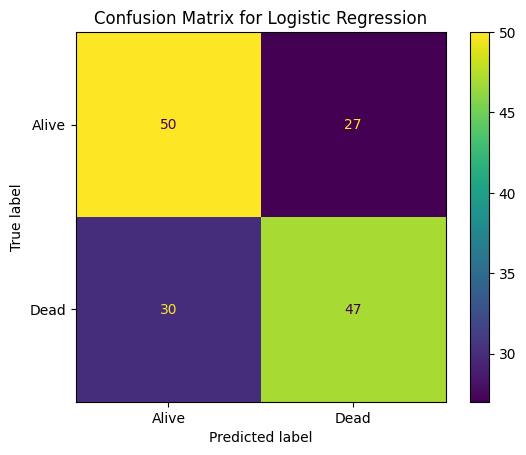

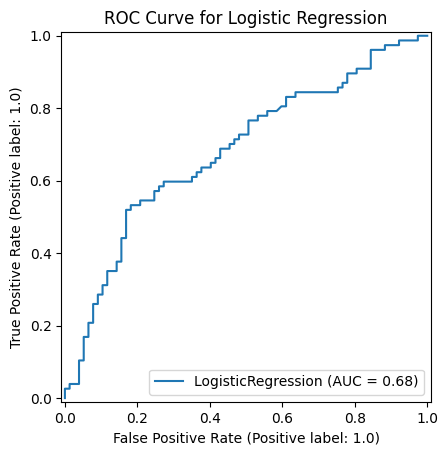


Logistic Regression Performance:
Accuracy: 0.6299

Classification Report:
              precision    recall  f1-score   support

       Alive       0.62      0.65      0.64        77
        Dead       0.64      0.61      0.62        77

    accuracy                           0.63       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.63      0.63      0.63       154



In [51]:
from sklearn.linear_model import LogisticRegression
# 1. Logistic Regression
# ----------------------
# Linear model for classification that works well for binary outcomes
# Uses regularization to prevent overfitting
print("\nBuilding Logistic Regression Model...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_model, lr_accuracy, lr_report = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")


Building MLP Classifier...


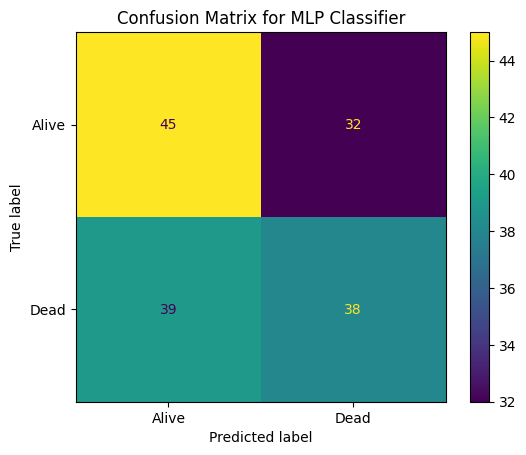

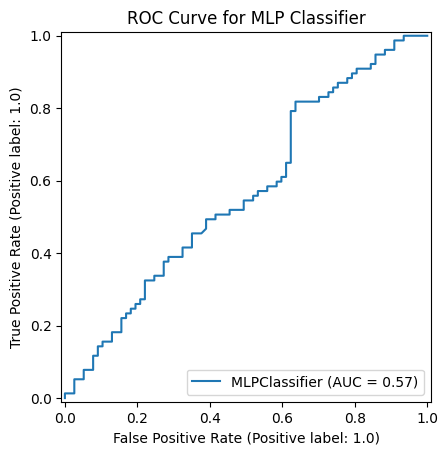


MLP Classifier Performance:
Accuracy: 0.5390

Classification Report:
              precision    recall  f1-score   support

       Alive       0.54      0.58      0.56        77
        Dead       0.54      0.49      0.52        77

    accuracy                           0.54       154
   macro avg       0.54      0.54      0.54       154
weighted avg       0.54      0.54      0.54       154



In [52]:
from sklearn.neural_network import MLPClassifier
# 3. Multi-layer Perceptron (Neural Network)
# -----------------------------------------
# Artificial neural network that can learn complex patterns
# Requires feature scaling and often benefits from hyperparameter tuning
print("\nBuilding MLP Classifier...")
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model, mlp_accuracy, mlp_report = evaluate_model(mlp, X_train_scaled, X_test_scaled, y_train, y_test, "MLP Classifier")

Ensemble Model Perfomance - Accuracy: 0.5909090909090909

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.77      0.65        77
         1.0       0.64      0.42      0.50        77

    accuracy                           0.59       154
   macro avg       0.60      0.59      0.58       154
weighted avg       0.60      0.59      0.58       154



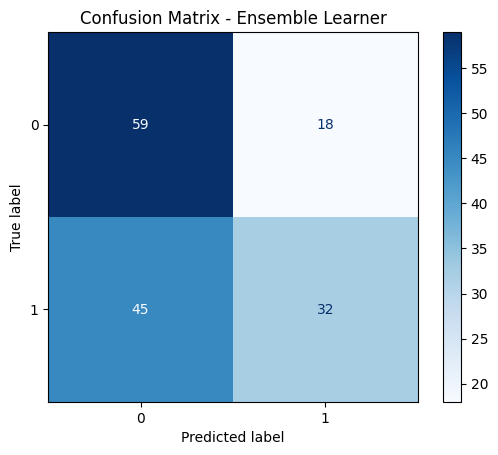

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)

# Define the individual classifiers
logistic_clf = LogisticRegression(max_iter=1000, solver='liblinear')
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Set up a hard voting ensemble
ensemble_model = VotingClassifier(
    estimators=[('Logistic Regression', logistic_clf), ('MLP Classifier', mlp_clf)],
    voting='hard'
)

# Train the ensemble model on scaled training data
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_preds = ensemble_model.predict(X_test_scaled)


# Evaluate the model
print("Ensemble Model Perfomance - Accuracy:", accuracy_score(y_test, y_preds))
print("\nClassification Report:")
print(classification_report(y_test, y_preds))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Ensemble Learner")
plt.grid(False)
plt.show()